In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from scipy.special import erf 
from scipy.spatial import distance
import scipy.optimize

In [2]:
def plot_line(
    x,y,fmt='-',lc='k',lw=2,label=None,
    x2=None,y2=None,fmt2='-',lc2='k',lw2=2,ms2=12,mfc2='none',mew2=2,label2=None,
    x3=None,y3=None,fmt3='-',lc3='k',lw3=2,ms3=12,mfc3='none',mew3=2,label3=None,
    x4=None,y4=None,fmt4='-',lc4='k',lw4=2,ms4=12,mfc4='none',mew4=2,label4=None,
    x5=None,y5=None,fmt5='-',lc5='k',lw5=2,ms5=12,mfc5='none',mew5=2,label5=None,
    x6=None,y6=None,fmt6='-',lc6='k',lw6=2,ms6=12,mfc6='none',mew6=2,label6=None,
    x7=None,y7=None,fmt7='-',lc7='k',lw7=2,ms7=12,mfc7='none',mew7=2,label7=None,
    x_fb=None,y_fb_low=None,y_fb_high=None,fba=0.1,fbc='g',labelfb=None,
    figsize=(10,5),
    xstr='',xfs=12,ystr='',yfs=12,
    tstr='',tfs=15,
    ylim=None,
    lfs=15,lloc='lower right'):
    """
    Plot a line
    """
    plt.figure(figsize=figsize)
    plt.plot(x,y,fmt,color=lc,linewidth=lw,label=label)
    if (x2 is not None):
        plt.plot(x2,y2,fmt2,color=lc2,linewidth=lw2,ms=ms2,mfc=mfc2,mew=mew2,label=label2)
    if (x3 is not None):
        plt.plot(x3,y3,fmt3,color=lc3,linewidth=lw3,ms=ms3,mfc=mfc3,mew=mew3,label=label3)
    if (x4 is not None):
        plt.plot(x4,y4,fmt4,color=lc4,linewidth=lw4,ms=ms4,mfc=mfc4,mew=mew4,label=label4)
    if (x5 is not None):
        plt.plot(x5,y5,fmt5,color=lc5,linewidth=lw5,ms=ms5,mfc=mfc5,mew=mew5,label=label5)
    if (x6 is not None):
        plt.plot(x6,y6,fmt6,color=lc6,linewidth=lw6,ms=ms6,mfc=mfc6,mew=mew6,label=label6)
    if (x7 is not None):
        plt.plot(x7,y7,fmt7,color=lc7,linewidth=lw7,ms=ms7,mfc=mfc7,mew=mew7,label=label7)

    if (x_fb is not None):
        plt.fill_between(x_fb.reshape(-1),
                        (y_fb_low).reshape(-1),
                        (y_fb_high).reshape(-1),
                        alpha=fba,color=fbc,label=labelfb)

    plt.xlabel(xstr,fontsize=xfs)
    plt.ylabel(ystr,fontsize=yfs)
    plt.title(tstr,fontsize=tfs)

    if ylim is not None:
        plt.ylim(ylim[0],ylim[1])

    plt.legend(fontsize=lfs,loc=lloc)
    plt.show()

In [96]:
def func_eval(x1,x2): # x:[n x d]
    y = hyperbolic_paraboloid(x1,x2)
    return y # y:[n x 1]

def hyperbolic_paraboloid(x1,x2):
    """
    f(x) = x1**2 - x2**2
        x: [N x d]
    """
    y = x1**2 - x2**2
    return y

## Plot underlying Function

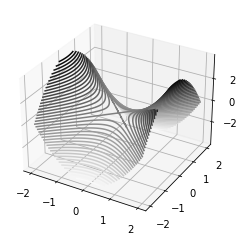

In [97]:
xmin,xmax = -2,2
x_range = np.linspace(start=xmin,stop=xmax,num=100).reshape((-1,1))
X1,X2 = np.meshgrid(x_range,x_range)

y = func_eval(X1,X2)
ax = plt.axes(projection='3d')

ax.contour3D(X1, X2, y, 50, cmap='binary')

## Plot Sample Points

In [114]:
def dist(Xsample1, Xsample2):
    d = (Xsample1**2 + Xsample2**2)**(1/2)
    return d

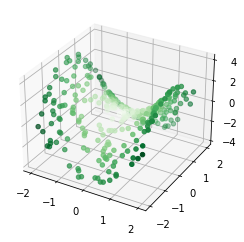

In [115]:
xmin,xmax = -2,2
np.random.seed(1)
Xsample1 = xmin + (xmax-xmin) * np.random.random(300)
Xsample2 = xmin + (xmax-xmin) * np.random.random(300)

Ysample = func_eval(Xsample1,Xsample2)
ax = plt.axes(projection='3d')

ax.scatter3D(Xsample1,Xsample2, Ysample, c=dist(Xsample1,Xsample2), cmap='Greens')

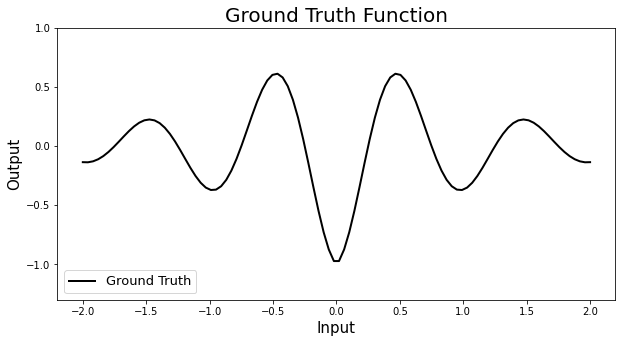

In [4]:
xmin,xmax = -2,2
x_target = np.linspace(start=xmin,stop=xmax,num=100).reshape((-1,1))
y_target = func_eval(x_target)
plot_line(
    x_target,y_target,fmt='-',lc='k',lw=2,label='Ground Truth',
    figsize=(10,5),xstr='Input',xfs=15,ystr='Output',yfs=15,tstr='Ground Truth Function',tfs=20,
    ylim=[-1.3,+1],
    lfs=13,lloc='lower left')